In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud


In [57]:
dataset1=pd.read_csv('https://raw.githubusercontent.com/topguns837/Hate-Speech-Detection/main/Datasets/dataset-1/train_E6oV3lV.csv?token=AMMDCH4VCBBMSWXVIRLIFZLB376N2',index_col=0)
dataset1.head(10)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...


In [29]:
dataset2=pd.read_csv('https://raw.githubusercontent.com/topguns837/Hate-Speech-Detection/main/Datasets/dataset-3/labeled_data.csv?token=AMMDCHYRCRHGVNQ3RUOBSC3B374UY')
dataset2.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [58]:
dataset3=pd.read_csv('https://raw.githubusercontent.com/topguns837/Hate-Speech-Detection/main/Datasets/dataset-2/2020-12-31-DynamicallyGeneratedHateDataset-entries-v0.1.csv?token=AMMDCH6DITPFYTEA63YMGOLB4ADRG',index_col=0)
dataset3.head(10)

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
6,10005,I don't work this hard so that those migrants ...,hate,notgiven,True,0.99506,dynabench entry,1,train,cagnluiznm
7,10006,I don't work this hard so that those foreigner...,hate,notgiven,True,0.99340,dynabench entry,1,train,cagnluiznm
8,10007,I don't work this hard so that those Hispanics...,hate,notgiven,True,0.98625,dynabench entry,1,train,cagnluiznm
9,10008,I don't work this hard so that those chavs can...,hate,notgiven,True,0.95252,dynabench entry,1,test,cagnluiznm
10,10009,I don't work this hard so that all those pakis...,hate,notgiven,False,0.09288,dynabench entry,1,train,cagnluiznm


In [59]:
print(dataset1.isnull().sum())

label    0
tweet    0
dtype: int64


In [60]:
print(dataset2.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [61]:
print(dataset2.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [62]:
print("+ve : {}".format((len(dataset1[dataset1.label==1])/len(dataset1))*100))
print("+ve : {}".format((len(dataset1[dataset1.label==0])/len(dataset1))*100))
print("total length : {}".format(len(dataset1)))
print("+ve length : ",2*len(dataset1[dataset1.label==1]))

+ve : 7.014579813528565
+ve : 92.98542018647143
total length : 31962
+ve length :  4484


In [63]:
print("+ve : {}".format((len(dataset2[dataset2.hate_speech==1])/len(dataset2))*100))
print("+ve : {}".format((len(dataset2[dataset2.hate_speech==0])/len(dataset2))*100))
print("total length : {}".format(len(dataset2)))
print("+ve length : ",2*len(dataset2[dataset2.hate_speech==1]))

+ve : 13.795747084695154
+ve : 79.85312512609451
total length : 24783
+ve length :  6838


In [64]:
print("+ve : {}".format((len(dataset3[dataset3.label=="hate"])/len(dataset3))*100))
print("+ve : {}".format((len(dataset3[dataset3.label=="nothate"])/len(dataset3))*100))
print("total length : {}".format(len(dataset3)))
print("+ve length : ",2*len(dataset3[dataset3.label=="hate"]))

+ve : 54.4617581173227
+ve : 45.5382418826773
total length : 40623
+ve length :  44248


In [65]:
dataset3.tail(10)

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
40731,9988,Dalits are worth of nothing,hate,notgiven,True,0.98205,dynabench entry,1,train,cagnluiznm
40732,9989,Dalits are worthy of nothing,hate,notgiven,True,0.98171,dynabench entry,1,test,cagnluiznm
40733,9990,we should forcibly remove all the dalits from ...,hate,notgiven,False,0.09661,dynabench entry,1,train,cagnluiznm
40734,9991,we should forcibly remove all the dalits from ...,hate,notgiven,True,0.87609,dynabench entry,1,train,cagnluiznm
40735,9994,Women are so hysterical,hate,notgiven,True,0.90521,dynabench entry,1,test,gnzuctwed3
40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm
40740,9999,dalits are deserves to be treated as lowlife,hate,notgiven,True,0.94324,dynabench entry,1,train,cagnluiznm


In [66]:
test_data=dataset3[dataset3.split=="test"]
train_data=dataset3[dataset3.split=="train"]

In [67]:
print(len(train_data))
print(len(test_data))

32497
4062


In [102]:
print("+ve : {}".format((len(train_data[train_data.label=="hate"])/len(train_data))*100))
print("-ve : {}".format((len(train_data[train_data.label=="nothate"])/len(train_data))*100))
print("total length : {}".format(len(train_data)))
print("+ve length : ",2*len(train_data[train_data.label=="hate"]))

+ve : 54.417330830538205
-ve : 45.582669169461795
total length : 32497
+ve length :  35368


In [97]:
train_data["new_label"]=""

C:\Users\Asus\AppData\Local\Temp/ipykernel_9288/399720002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["new_label"]=""


In [98]:
#train_data.add("new_label",axis=1)

In [99]:
for index, row in train_data.iterrows():
    if row["model_wrong"]==False:
        train_data.at[index, "new_label"] = row["label"]
    else:
        if row["label"]=="hate":
            train_data.at[index, "new_label"]="nothate"
        else:
            train_data.at[index, "new_label"] = "hate"

In [100]:
train_data["new_label"].tail(10)

40729    nothate
40730    nothate
40731    nothate
40733       hate
40734    nothate
40736    nothate
40737    nothate
40738    nothate
40739    nothate
40740    nothate
Name: new_label, dtype: object

In [103]:
print("+ve : {}".format((len(train_data[train_data.new_label=="hate"])/len(train_data))*100))
print("-ve : {}".format((len(train_data[train_data.new_label=="nothate"])/len(train_data))*100))
print("total length : {}".format(len(train_data)))
print("+ve length : ",2*len(train_data[train_data.new_label=="hate"]))

+ve : 46.133489245161094
-ve : 53.866510754838906
total length : 32497
+ve length :  29984


In [105]:
train_data.head(10)

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,new_label
1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3,nothate
3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm,nothate
5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm,nothate
6,10005,I don't work this hard so that those migrants ...,hate,notgiven,True,0.99506,dynabench entry,1,train,cagnluiznm,nothate
7,10006,I don't work this hard so that those foreigner...,hate,notgiven,True,0.99340,dynabench entry,1,train,cagnluiznm,nothate
8,10007,I don't work this hard so that those Hispanics...,hate,notgiven,True,0.98625,dynabench entry,1,train,cagnluiznm,nothate
10,10009,I don't work this hard so that all those pakis...,hate,notgiven,False,0.09288,dynabench entry,1,train,cagnluiznm,hate
11,10010,I don't work this hard so that all those musli...,hate,notgiven,False,0.46144,dynabench entry,1,train,cagnluiznm,hate
12,10012,foreigners are a burden to our society,hate,notgiven,True,0.98753,dynabench entry,1,train,cagnluiznm,nothate
13,10013,immigrants are a burden to our society,hate,notgiven,True,0.98971,dynabench entry,1,train,cagnluiznm,nothate


In [110]:
train_data["is_hate"]=0

for index, row in train_data.iterrows():
    if row["new_label"]=="nothate":
        train_data.at[index, "is_hate"] = 0
    else:
        train_data.at[index, "is_hate"] = 1
        



C:\Users\Asus\AppData\Local\Temp/ipykernel_9288/3701685404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["is_hate"]=0


In [111]:
train_data.head(10)

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,new_label,is_hate
1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3,nothate,0
3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm,nothate,0
5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm,nothate,0
6,10005,I don't work this hard so that those migrants ...,hate,notgiven,True,0.99506,dynabench entry,1,train,cagnluiznm,nothate,0
7,10006,I don't work this hard so that those foreigner...,hate,notgiven,True,0.99340,dynabench entry,1,train,cagnluiznm,nothate,0
8,10007,I don't work this hard so that those Hispanics...,hate,notgiven,True,0.98625,dynabench entry,1,train,cagnluiznm,nothate,0
10,10009,I don't work this hard so that all those pakis...,hate,notgiven,False,0.09288,dynabench entry,1,train,cagnluiznm,hate,1
11,10010,I don't work this hard so that all those musli...,hate,notgiven,False,0.46144,dynabench entry,1,train,cagnluiznm,hate,1
12,10012,foreigners are a burden to our society,hate,notgiven,True,0.98753,dynabench entry,1,train,cagnluiznm,nothate,0
13,10013,immigrants are a burden to our society,hate,notgiven,True,0.98971,dynabench entry,1,train,cagnluiznm,nothate,0


In [112]:
train_data.tail(10)

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,new_label,is_hate
40729,9986,Dalits are nothing but dirt,hate,notgiven,True,0.95793,dynabench entry,1,train,cagnluiznm,nothate,0
40730,9987,"Mike's new bird is a stunner, he likes a piece...",hate,notgiven,True,0.99439,dynabench entry,1,train,gnzuctwed3,nothate,0
40731,9988,Dalits are worth of nothing,hate,notgiven,True,0.98205,dynabench entry,1,train,cagnluiznm,nothate,0
40733,9990,we should forcibly remove all the dalits from ...,hate,notgiven,False,0.09661,dynabench entry,1,train,cagnluiznm,hate,1
40734,9991,we should forcibly remove all the dalits from ...,hate,notgiven,True,0.87609,dynabench entry,1,train,cagnluiznm,nothate,0
40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm,nothate,0
40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm,nothate,0
40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm,nothate,0
40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm,nothate,0
40740,9999,dalits are deserves to be treated as lowlife,hate,notgiven,True,0.94324,dynabench entry,1,train,cagnluiznm,nothate,0


In [113]:
print("+ve : {}".format((len(train_data[train_data.is_hate==1])/len(train_data))*100))
print("-ve : {}".format((len(train_data[train_data.is_hate==0])/len(train_data))*100))
print("total length : {}".format(len(train_data)))
print("+ve length : ",2*len(train_data[train_data.is_hate==1]))

+ve : 46.133489245161094
-ve : 53.866510754838906
total length : 32497
+ve length :  29984


In [116]:
train=train_data[["text","is_hate"]]

In [117]:
train.shape

(32497, 2)

In [118]:
train.head(10)

,text,is_hate
1,It should be legal for a husband to rape his wife,0
3,dalits are lowlives,0
5,I don't work this hard so that those immigrant...,0
6,I don't work this hard so that those migrants ...,0
7,I don't work this hard so that those foreigner...,0
8,I don't work this hard so that those Hispanics...,0
10,I don't work this hard so that all those pakis...,1
11,I don't work this hard so that all those musli...,1
12,foreigners are a burden to our society,0
13,immigrants are a burden to our society,0


In [119]:
train.tail(10)

,text,is_hate
40729,Dalits are nothing but dirt,0
40730,"Mike's new bird is a stunner, he likes a piece...",0
40731,Dalits are worth of nothing,0
40733,we should forcibly remove all the dalits from ...,1
40734,we should forcibly remove all the dalits from ...,0
40736,we should forcibly remove all the foreigners f...,0
40737,we should forcibly remove all the immigrants f...,0
40738,dalits are unworthy of the Gods love,0
40739,dalits are worthless,0
40740,dalits are deserves to be treated as lowlife,0


   # Data Cleaning

In [121]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

In [122]:
train=clean_text(train,"text")

C:\Users\Asus\AppData\Local\Temp/ipykernel_9288/4061539463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].str.lower()
C:\Users\Asus\AppData\Local\Temp/ipykernel_9288/4061539463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))


In [124]:
train.head(10)

,text,is_hate
1,it should be legal for a husband to rape his wife,0
3,dalits are lowlives,0
5,i dont work this hard so that those immigrants...,0
6,i dont work this hard so that those migrants c...,0
7,i dont work this hard so that those foreigners...,0
8,i dont work this hard so that those hispanics ...,0
10,i dont work this hard so that all those pakis ...,1
11,i dont work this hard so that all those muslim...,1
12,foreigners are a burden to our society,0
13,immigrants are a burden to our society,0


## Saving clean dataframe to csv

In [125]:
train.to_csv("train.csv",index=False)

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Asus\AppData\Local\Programs\Python\Python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Asus\\AppData\\Local\\Temp\\pip-install-3hpop6op\\wordcloud_a834308d97e4444a87e6dbccb91f9a51\\setup.py'"'"'; __file__='"'"'C:\\Users\\Asus\\AppData\\Local\\Temp\\pip-install-3hpop6op\\wordcloud_a834308d97e4444a87e6dbccb91f9a51\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Asus\AppData\Local\Temp\pip-wheel-xhzwpskt'
       cwd: C:\Users\Asus\AppData\Local\Temp\pip-install-3hpop6op\wordcloud_a834308d97e4444a87e6dbccb91f9a51\
  Complete output (65 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating

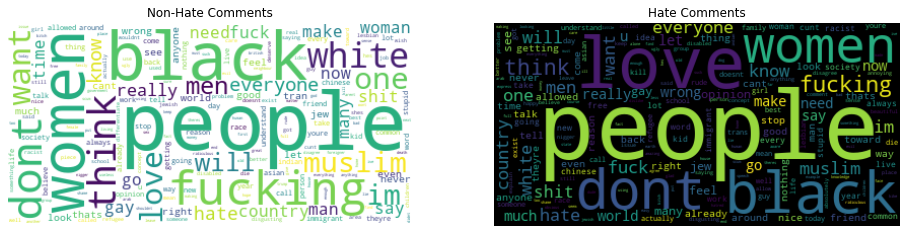

In [131]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train['text'][train.is_hate == 0])
text_neg = " ".join(train['text'][train.is_hate == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

In [133]:
train[train.is_hate==1].head(10)

,text,is_hate
10,i dont work this hard so that all those pakis ...,1
11,i dont work this hard so that all those muslim...,1
22,why is it that africans smell weird do they no...,1
29,i dont hatefucking islam,1
30,i dont hate fucking muslims,1
32,government is incompetent,1
39,disabled people are stupid,1
44,arabs are terrorists,1
46,terrorists must be muslim rats,1
49,veiled women are dumb,1


In [134]:
train_new=train_data[["text","label"]]

In [135]:
train_new.head(10)

,text,label
1,It should be legal for a husband to rape his wife,hate
3,dalits are lowlives,hate
5,I don't work this hard so that those immigrant...,hate
6,I don't work this hard so that those migrants ...,hate
7,I don't work this hard so that those foreigner...,hate
8,I don't work this hard so that those Hispanics...,hate
10,I don't work this hard so that all those pakis...,hate
11,I don't work this hard so that all those musli...,hate
12,foreigners are a burden to our society,hate
13,immigrants are a burden to our society,hate


In [136]:
for index, row in train_new.iterrows():
    if row["label"]=="nothate":
        train_data.at[index, "label"] = 0
    else:
        train_data.at[index, "label"] = 1
        

In [139]:
train_new.head(10)

,text,label
1,It should be legal for a husband to rape his wife,hate
3,dalits are lowlives,hate
5,I don't work this hard so that those immigrant...,hate
6,I don't work this hard so that those migrants ...,hate
7,I don't work this hard so that those foreigner...,hate
8,I don't work this hard so that those Hispanics...,hate
10,I don't work this hard so that all those pakis...,hate
11,I don't work this hard so that all those musli...,hate
12,foreigners are a burden to our society,hate
13,immigrants are a burden to our society,hate


In [140]:
train_new.tail(10)

,text,label
40729,Dalits are nothing but dirt,hate
40730,"Mike's new bird is a stunner, he likes a piece...",hate
40731,Dalits are worth of nothing,hate
40733,we should forcibly remove all the dalits from ...,hate
40734,we should forcibly remove all the dalits from ...,hate
40736,we should forcibly remove all the foreigners f...,hate
40737,we should forcibly remove all the immigrants f...,hate
40738,dalits are unworthy of the Gods love,hate
40739,dalits are worthless,hate
40740,dalits are deserves to be treated as lowlife,hate


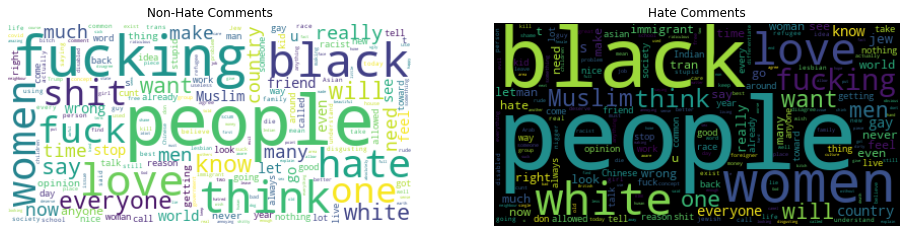

In [141]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_new['text'][train_new.label == "nothate"])
text_neg = " ".join(train_new['text'][train_new.label == "hate"])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()